sampling
sampling done
0 (())_with_int_labels


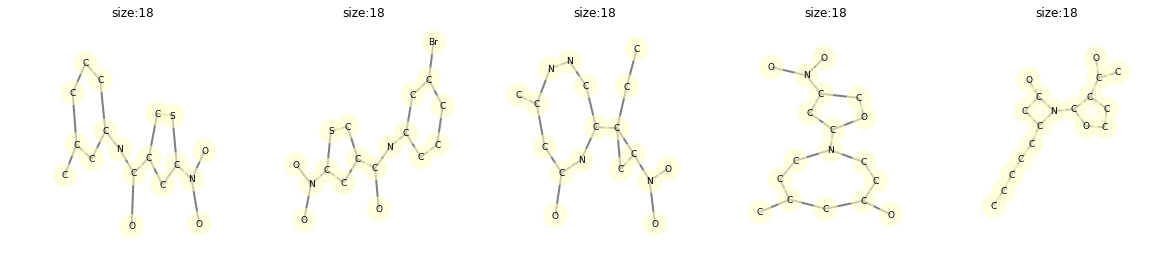

1 (())_with_int_labels


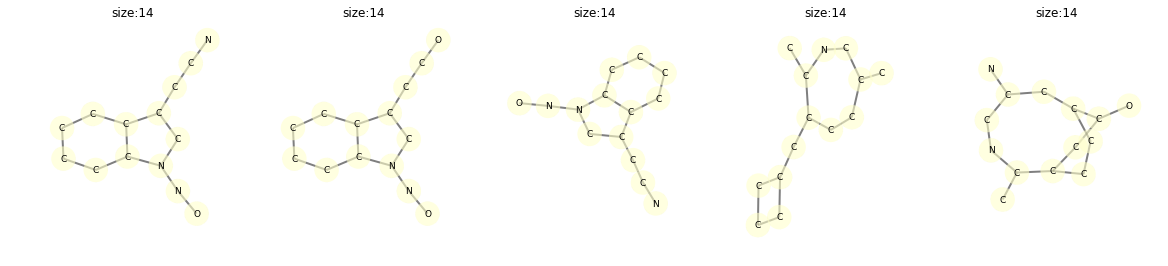

2 (())_with_int_labels


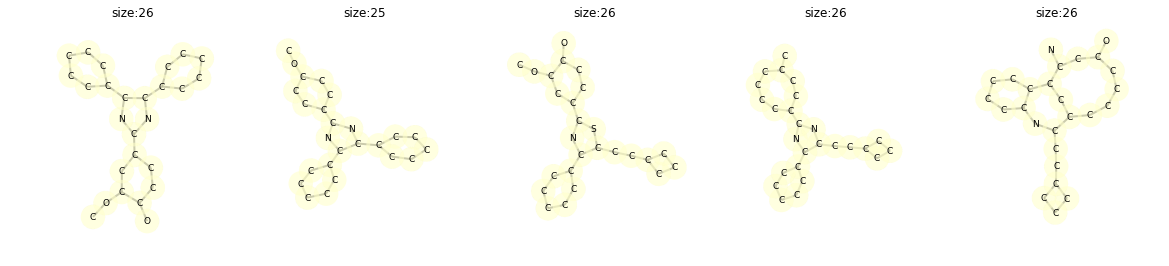

3 (())_with_int_labels


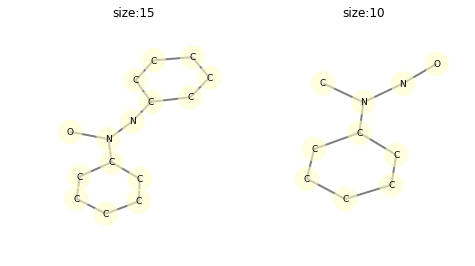

4 (())_with_int_labels


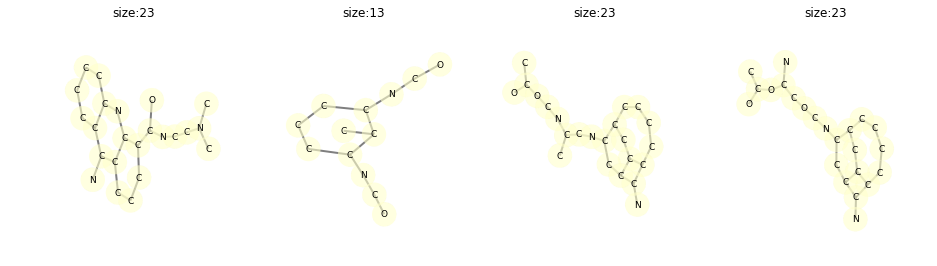

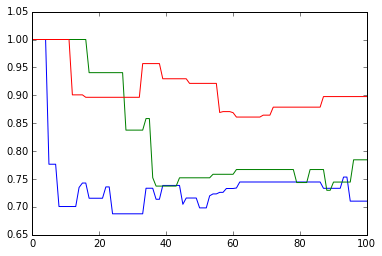

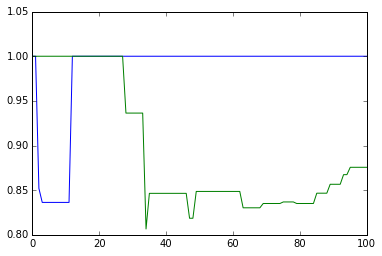

CPU times: user 1min 40s, sys: 6.8 s, total: 1min 47s
Wall time: 1min 55s


In [1]:
%%time
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1,filename='LOORG.log')


'''
GOOD STUFF  lets test the directed sampling
'''
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline

import graphlearn.utils.draw as myutils
import graphlearn.directedsampler as ds
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as eg
steps=100

#sampler=ds.directedSampler(vectorizer=eg.Vectorizer(  normalization=False, inner_normalization=False))
sampler= ds.directedSampler(thickness_list=[1])
#food=gspan_to_eden( 'bursi.pos.gspan' )
#food= itertools.islice(food,50)
#sampler.fit(food,  n_jobs=3)
#sampler.save('tmp/cluster.ge')
#print 'saved'
sampler.load('tmp/cluster.ge')
sampler.vectorizer= eg.Vectorizer(   normalization=False,
                 inner_normalization=False)
graphs = gspan_to_eden( 'bursi.pos.gspan' )
#graphs = itertools.islice(graphs,50)
targetz = gspan_to_eden( 'bursi.pos.gspan' )
targetz = itertools.islice(targetz,5)

print 'sampling'
graphs = sampler.sample(graphs,
                        start_graphs=targetz,
                        targets_in_graphs=True,
                        n_samples=5,
                        batch_size=1,
                        n_steps=steps,
                        n_jobs=1,
                        select_cip_max_tries = 100,
                        #accept_annealing_factor=0.7,
                        accept_static_penalty= 0.75
                        )

print 'sampling done'
history=[]
for  i, gr in enumerate(graphs):
    print i,gr
    history.append(gr.graph['sampling_info']['score_history'])
    myutils.draw_graph_set_graphlearn(gr.graph['sampling_info']['graphs_history'])

t = range(steps+1) 
for h in history[:3]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[3:6]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[6:]:
    plt.plot(t, h)
plt.show()

# the graph history shows [start;end; the ; progression; ...]
# see cluster.py to change score function
# also radius 0 might be good to allow :) 

In [ ]:
a=range(3)
b=range(3)
for c,d in zip(a,b):
    print c,d

(1, 1048577)
sampling
sampling done
0 (())_with_int_labels


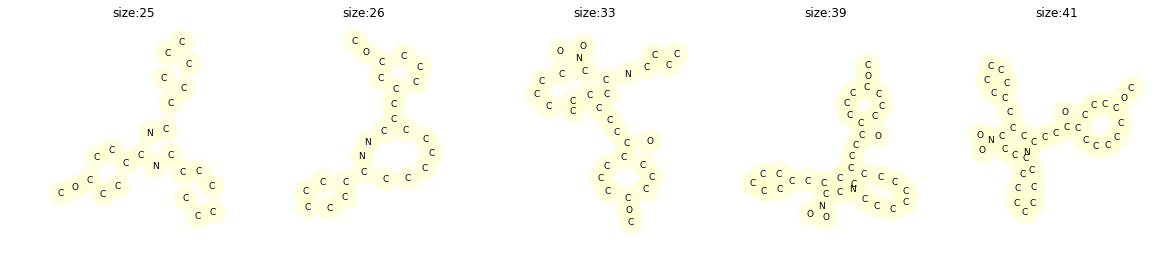

1 (())_with_int_labels


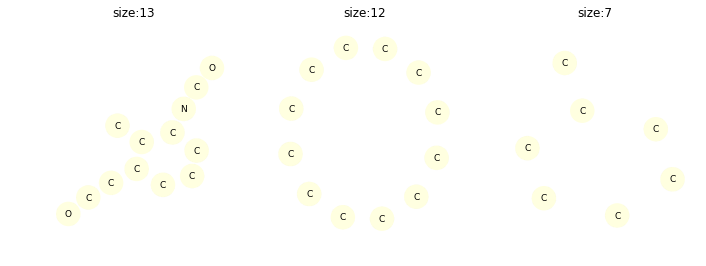

2 (())_with_int_labels


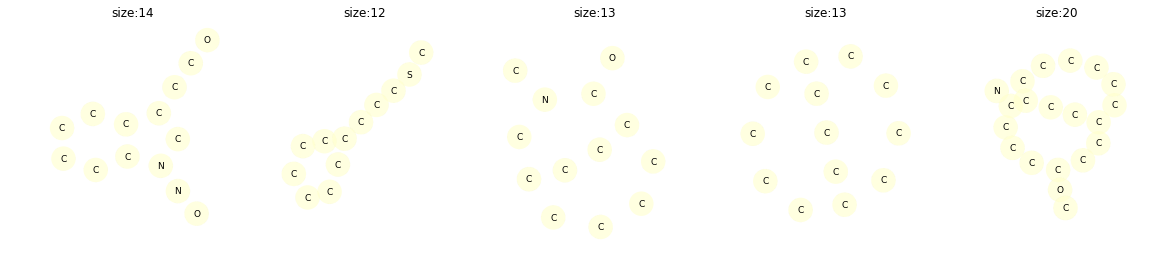

3 (())_with_int_labels


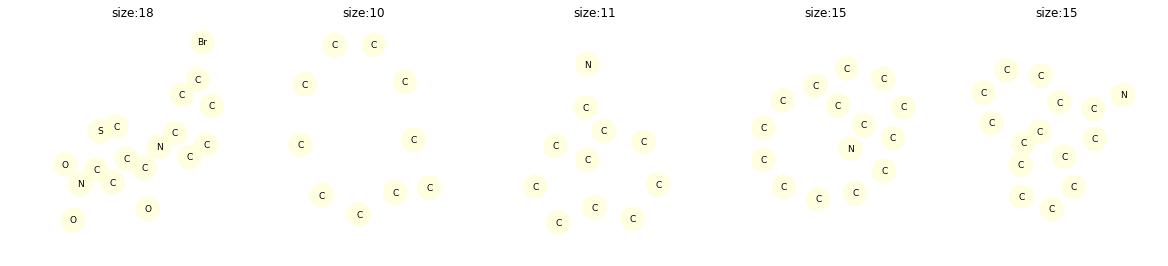

4 (())_with_int_labels


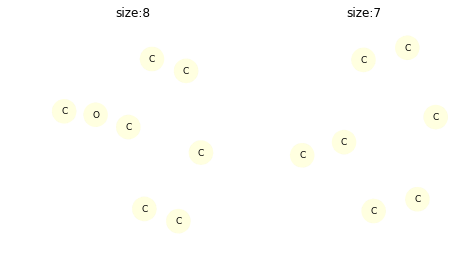

5 (())_with_int_labels


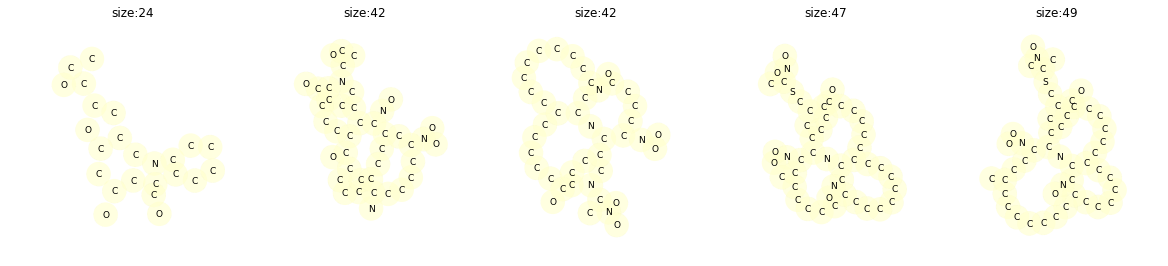

6 (())_with_int_labels


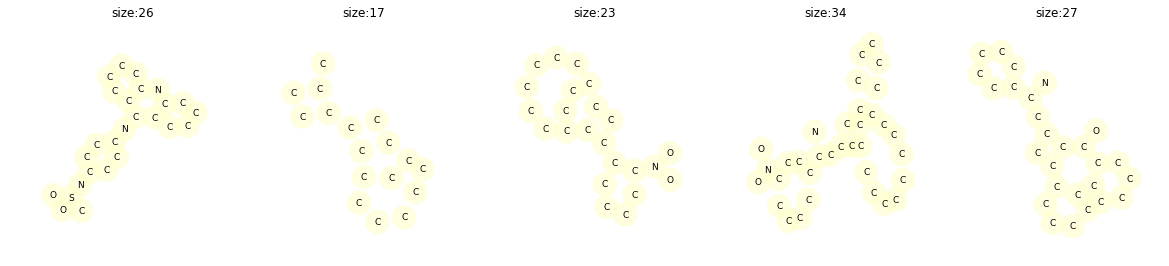

7 (())_with_int_labels


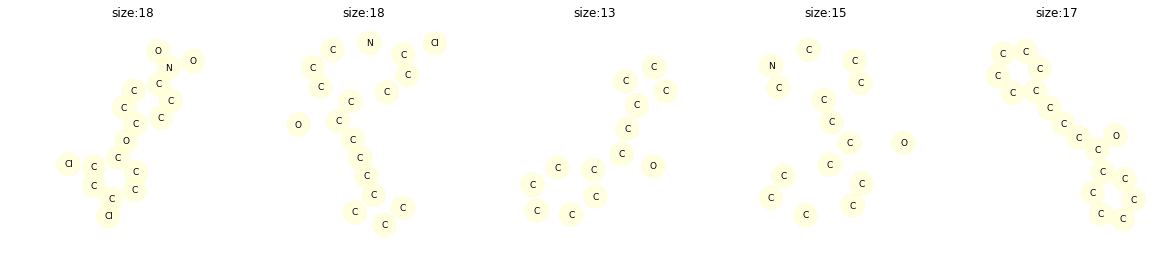

8 (())_with_int_labels


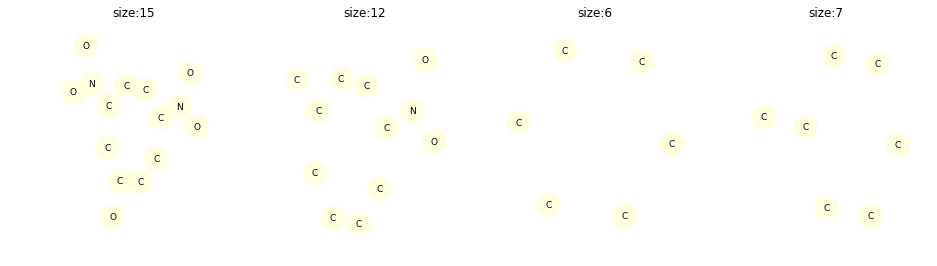

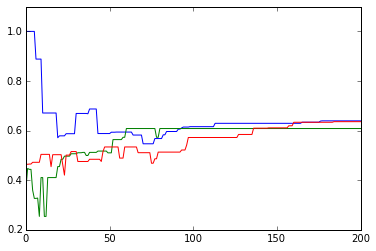

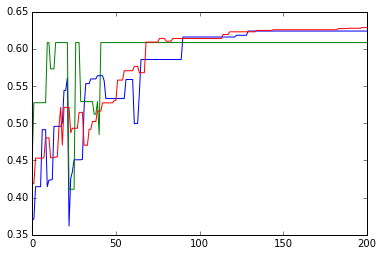

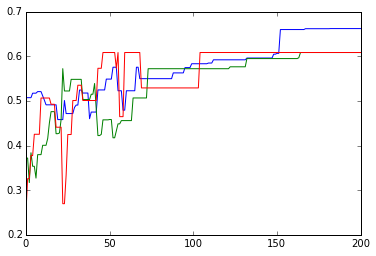

CPU times: user 53 s, sys: 628 ms, total: 53.7 s
Wall time: 55.1 s


In [3]:
%%time

'''
 directed sampling 
'''
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.directedsampler as ds
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as eg
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)


# preparing sampler
sampler = ds.directedSampler()

def save():
    food=gspan_to_eden( 'bursi.pos.gspan' )
    food= itertools.islice(food,50)
    sampler.fit(food,  n_jobs=3)
    sampler.save('tmp/cluster.ge')
    print 'saved'

#save()
sampler.load('tmp/cluster.ge')




# creating food for sampling
graphs = gspan_to_eden( 'bursi.pos.gspan' )
graphs = itertools.islice(graphs,9)

targetz = gspan_to_eden( 'bursi.pos.gspan' )
targetz = itertools.islice(targetz,200)
#target_vect = sampler.get_average_vector(targetz)

print target_vect.shape


#g=graphs.next()
#v= sampler.vectorizer.transform_single(g)
#print target_vect.dot(v.T)[0,0]

print 'sampling'
steps=200
graphs = sampler.sample(graphs,
                        target_graph=targetz.next(),
                        start_graphs=None,
                        target_vector= None,
                        
                        n_samples=5,
                        batch_size=1,
                        n_steps=steps,
                        n_jobs=1,
                        select_cip_max_tries = 100,
                        accept_annealing_factor=1.0,
                        accept_static_penalty= 0.45
                        )

print 'sampling done'
history=[]
for  i, gr in enumerate(graphs):
    print i,gr
    history.append(gr.graph['sampling_info']['score_history'])
    myutils.draw_graph_set_graphlearn(gr.graph['sampling_info']['graphs_history'])

t = range(steps+1) 
for h in history[:3]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[3:6]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[6:]:
    plt.plot(t, h)
plt.show()


In [7]:
import numpy as np
np.matrix(np.random.rand(5, 10)).mean(axis=0).shape

(1, 10)

In [8]:
np.matrix(np.random.rand(5, 10)).mean(axis=0)

matrix([[ 0.66302318,  0.60884753,  0.38390459,  0.4124559 ,  0.50540498,
          0.35303513,  0.65330926,  0.66660517,  0.53155256,  0.44495143]])